In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_ollama.llms import OllamaLLM
from typing import TypedDict , Annotated
from langchain_core.messages import BaseMessage , HumanMessage,SystemMessage, AIMessage

In [2]:
from langgraph.graph.message import add_messages
model = OllamaLLM(model="llama2",temperature=0.7)

In [3]:
class ChatState(TypedDict):
    
    message: Annotated[list[BaseMessage],add_messages]

In [4]:
def Chat_node(state:ChatState):
    
    message= state['message']
    response = model.invoke(message)
    return {'message': [response]}

In [5]:
graph = StateGraph(ChatState)

graph.add_node('chatNode',Chat_node)
graph.add_edge(START,'chatNode')
graph.add_edge('chatNode',END)

chatbot = graph.compile()

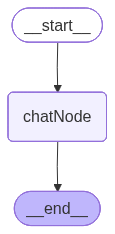

In [6]:
from IPython.display import Image
Image(chatbot.get_graph().draw_mermaid_png())

In [7]:
initial_state = {'message':[HumanMessage(content="what is langgraph?")]}

chatbot.invoke(initial_state)['message'][-1].content

"\nLanggraph is a term that refers to a type of graph that is specifically designed for natural language processing (NLP) tasks. A langgraph typically consists of nodes and edges, where the nodes represent words or phrases in a text corpus, and the edges represent the relationships between these words or phrases.\n\nThe main idea behind a langgraph is to capture the complex structural patterns and dependencies present in natural language texts. Traditional graph-based methods for NLP often rely on simplistic representations of language, such as bag-of-words or word embeddings, which can't fully capture the nuances of linguistic structure. Langgraphs, on the other hand, are designed to capture these nuances by representing words and phrases in a more sophisticated way.\n\nThere are several key features of langgraphs that make them useful for NLP tasks:\n\n1. Node properties: Each node in a langgraph can have additional properties beyond just the word or phrase it represents. For example

In [ ]:
while True:
    ques = input("Ask anything")
    print('user:', ques)
    if ques.strip().lower() in ['quit','exit','bye']:
        break
    res = chatbot.invoke({'messages':[HumanMessage(content=ques)]})
    print('AI',res)